# Housing prices prediction

### Objective: Prediction of the future house prices

## Inicialization

### Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

### Auxiliary functions

In [8]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [9]:
def test_metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    print('Mean Absolute Error:', mae)

    rmse = root_mean_squared_error(y, y_pred)
    print('Root Mean Squared Error:', rmse)

### Visual config

In [11]:
%matplotlib inline
plt.style.use('bmh')
sns.set(style='whitegrid')

## Data visualization

In [13]:
df = pd.read_csv('AmesHousing.csv')

In [14]:
df.shape

(2930, 82)

In [15]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [16]:
print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))

Número de características: 82
Longitud del conjunto de datos: 2930


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [18]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [19]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [20]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

### Output distribution

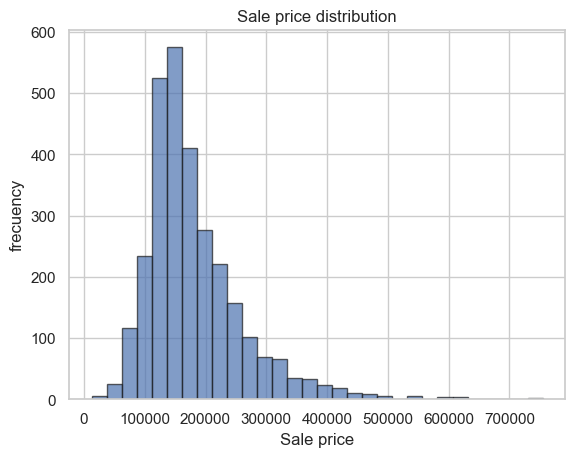

In [22]:
plt.hist(df['SalePrice'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Sale price")
plt.ylabel("frecuency")
plt.title("Sale price distribution")
plt.show()

## Cleaning Data

### Dropping main null values

In [25]:
df.drop(['Order','Alley', 'Misc Feature', 'Pool QC', 'Fence', 'Mas Vnr Type', 'Fireplace Qu'], axis=1, inplace=True)

In [26]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [27]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Lot Frontage      490
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

### Dataset division

In [29]:
train_set, val_set, test_set = train_val_test_split(df)

In [30]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 1758
Longitud del Validation Set: 586
Longitud del Test Set: 586


In [31]:
X_train = train_set.drop("SalePrice", axis=1)
y_train = train_set["SalePrice"].copy()

X_val = val_set.drop("SalePrice", axis=1)
y_val = val_set["SalePrice"].copy()

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

### Imputing and encoding

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Num var Pipeline: imputing and scaling
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('rbst_scaler', RobustScaler())
])

# Cat var Pipeline: imputing and codification
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
# num and var features identification
num_attribs = list(X_train.select_dtypes(exclude=['object']).columns)
cat_attribs = list(X_train.select_dtypes(include=['object']).columns)

# Creating ColumnTransformer applying pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])


In [35]:
X_train_prep = full_pipeline.fit_transform(X_train).toarray()
X_val_prep = full_pipeline.transform(X_val).toarray()
X_test_prep = full_pipeline.transform(X_test).toarray()

In [36]:
column_names = full_pipeline.get_feature_names_out()
X_train_prep = pd.DataFrame(X_train_prep, columns=column_names, index=X_train.index)
X_val_prep = pd.DataFrame(X_val_prep, columns=column_names, index=X_val.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=column_names, index=X_test.index)

In [37]:
X_train_prep

,num__PID,num__MS SubClass,num__Lot Frontage,num__Lot Area,num__Overall Qual,num__Overall Cond,num__Year Built,num__Year Remod/Add,num__Mas Vnr Area,num__BsmtFin SF 1,...,cat__Sale Type_ConLw,cat__Sale Type_New,cat__Sale Type_Oth,cat__Sale Type_WD,cat__Sale Condition_Abnorml,cat__Sale Condition_AdjLand,cat__Sale Condition_Alloca,cat__Sale Condition_Family,cat__Sale Condition_Normal,cat__Sale Condition_Partial
1322,0.969099,0.4,-0.388889,0.354134,0.5,2.0,-1.744681,0.189189,0.000000,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2475,-0.010762,0.2,-0.111111,-0.378557,0.5,0.0,0.702128,0.351351,1.090333,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2090,0.979124,-0.6,2.611111,0.245940,0.5,0.0,0.382979,-0.027027,0.000000,0.482618,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2733,0.977017,0.0,-0.277778,-0.698986,-0.5,0.0,-0.638298,-1.135135,0.000000,-0.209952,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2881,0.992261,2.8,-0.944444,-0.085481,-0.5,1.0,-0.446809,-1.108108,0.000000,-0.523517,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.021722,2.8,7.111111,7.876420,-0.5,0.0,-0.063830,-0.054054,0.000000,0.903885,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,-0.018912,0.2,0.000000,-0.390768,0.5,0.0,0.638298,0.270270,0.000000,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,-0.018384,0.2,-0.166667,-0.136525,0.0,0.0,0.659574,0.297297,0.000000,0.162236,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.968318,0.0,0.777778,-0.498718,-0.5,0.0,-1.106383,-1.135135,0.000000,-0.032720,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
X_val_prep

,num__PID,num__MS SubClass,num__Lot Frontage,num__Lot Area,num__Overall Qual,num__Overall Cond,num__Year Built,num__Year Remod/Add,num__Mas Vnr Area,num__BsmtFin SF 1,...,cat__Sale Type_ConLw,cat__Sale Type_New,cat__Sale Type_Oth,cat__Sale Type_WD,cat__Sale Condition_Abnorml,cat__Sale Condition_AdjLand,cat__Sale Condition_Alloca,cat__Sale Condition_Family,cat__Sale Condition_Normal,cat__Sale Condition_Partial
1047,-0.021122,2.2,-2.388889,-1.719868,0.0,1.0,0.063830,-0.459459,0.000000,-0.133606,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
565,-0.005929,2.2,-1.944444,-1.580169,0.5,0.0,0.680851,0.351351,0.000000,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2306,-0.024162,-0.6,1.000000,0.288924,0.0,1.0,-0.340426,-0.972973,1.546751,0.530334,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2279,1.024025,1.4,-0.277778,-0.644767,0.0,0.0,0.510638,0.135135,0.849445,-0.501704,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1659,-0.021371,0.2,0.000000,0.740994,0.5,2.0,0.085106,-0.432432,1.477021,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1.006017,-0.6,-0.166667,-0.076444,1.0,0.0,0.723404,0.378378,0.202853,0.059986,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1313,0.968835,0.5,-0.388889,0.061058,0.0,0.0,-1.170213,-1.135135,0.000000,-0.088616,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
908,0.986987,0.0,-0.388889,0.134327,0.0,2.0,-0.680851,-1.135135,0.000000,-0.523517,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2321,-0.022034,0.2,5.611111,3.396508,0.5,0.0,0.723404,0.378378,0.000000,-0.523517,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Selecting Features using Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

clf_rnd = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_prep, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [41]:
importances = clf_rnd.feature_importances_
feature_names = X_train_prep.columns

feature_importances = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

feature_importances

,feature,importance
4,num__Overall Qual,5.535877e-01
16,num__Gr Liv Area,1.034472e-01
13,num__1st Flr SF,4.502744e-02
19,num__Full Bath,3.697734e-02
12,num__Total Bsmt SF,3.163666e-02
...,...,...
133,cat__Exterior 1st_AsphShn,1.562766e-07
247,cat__Garage Cond_Ex,1.445487e-07
54,cat__Utilities_NoSeWa,1.371880e-07
180,cat__Bsmt Qual_Po,7.514883e-08


In [42]:
top_features = feature_importances.head(20)["feature"].tolist()
X_train_top = X_train_prep[top_features]
X_val_top = X_val_prep[top_features]
X_test_top = X_test_prep[top_features]

In [43]:
X_train_top

,num__Overall Qual,num__Gr Liv Area,num__1st Flr SF,num__Full Bath,num__Total Bsmt SF,num__BsmtFin SF 1,num__Lot Area,num__2nd Flr SF,num__Garage Area,num__Year Built,num__Garage Cars,num__PID,cat__Kitchen Qual_Ex,num__Mas Vnr Area,num__Year Remod/Add,cat__Bsmt Qual_Ex,num__TotRms AbvGrd,num__Lot Frontage,num__Bsmt Unf SF,num__Mo Sold
1322,0.5,1.724561,0.456973,0.0,0.650841,-0.523517,0.354134,1.689778,-0.536965,-1.744681,0.0,0.969099,0.0,0.000000,0.189189,0.0,2.0,-0.388889,1.488493,1.50
2475,0.5,0.402125,-0.377844,0.0,-0.183976,-0.523517,-0.378557,1.136526,-0.070039,0.702128,0.0,-0.010762,0.0,1.090333,0.351351,0.0,1.0,-0.111111,0.755536,-0.50
2090,0.5,0.003269,0.712166,0.0,-0.146390,0.482618,0.245940,0.000000,0.929961,0.382979,0.0,0.979124,0.0,0.000000,-0.027027,0.0,0.0,2.611111,-0.493270,-0.25
2733,-0.5,-0.474050,-0.559842,-1.0,-0.365974,-0.209952,-0.698986,0.501787,-1.031128,-0.638298,-1.0,0.977017,0.0,0.000000,-1.135135,0.0,0.0,-0.277778,0.196266,-0.75
2881,-0.5,-0.071925,-0.043521,0.0,-0.640950,-0.523517,-0.085481,0.480343,-1.867704,-0.446809,-2.0,0.992261,0.0,0.000000,-1.108108,0.0,1.0,-0.944444,0.354320,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.5,-0.026154,0.676558,-1.0,0.229476,0.903885,7.876420,0.000000,1.354086,-0.063830,1.0,-0.021722,0.0,0.000000,-0.054054,0.0,0.5,7.111111,-0.699957,1.25
1095,0.5,-0.042501,-0.741840,0.0,-0.547972,-0.523517,-0.390768,1.010722,-0.299611,0.638298,0.0,-0.018912,0.0,0.000000,0.270270,0.0,0.0,0.000000,0.435953,-0.50
1130,0.0,0.470781,-0.431256,0.0,-0.237389,0.162236,-0.136525,1.235168,0.750973,0.659574,0.0,-0.018384,0.0,0.000000,0.297297,0.0,0.5,-0.166667,-0.165002,-0.25
1294,-0.5,0.490396,-0.241345,-1.0,-0.094955,-0.032720,-0.498718,1.115082,-0.992218,-1.106383,-1.0,0.968318,1.0,0.000000,-1.135135,0.0,0.0,0.777778,0.208424,0.00


In [44]:
X_val_top

,num__Overall Qual,num__Gr Liv Area,num__1st Flr SF,num__Full Bath,num__Total Bsmt SF,num__BsmtFin SF 1,num__Lot Area,num__2nd Flr SF,num__Garage Area,num__Year Built,num__Garage Cars,num__PID,cat__Kitchen Qual_Ex,num__Mas Vnr Area,num__Year Remod/Add,cat__Bsmt Qual_Ex,num__TotRms AbvGrd,num__Lot Frontage,num__Bsmt Unf SF,num__Mo Sold
1047,0.0,0.026154,-0.449060,0.0,-0.255193,-0.133606,-1.719868,0.859185,-0.077821,0.063830,0.0,-0.021122,0.0,0.000000,-0.459459,0.0,0.5,-2.388889,-0.314373,-0.25
565,0.5,2.558235,0.581602,0.0,0.775470,-0.523517,-1.580169,2.328806,0.871595,0.680851,1.0,-0.005929,0.0,0.000000,0.351351,0.0,1.5,-1.944444,1.597916,0.25
2306,0.0,-0.680016,-0.114738,-1.0,0.047478,0.530334,0.288924,0.000000,-0.649805,-0.340426,-1.0,-0.024162,0.0,1.546751,-0.972973,0.0,-0.5,1.000000,-0.383847,0.50
2279,0.0,-0.823866,-0.288823,-2.0,-0.126607,-0.501704,-0.644767,0.000000,-0.077821,0.510638,0.0,1.024025,0.0,0.849445,0.135135,1.0,-1.5,-0.277778,-0.792010,0.00
1659,0.5,0.809154,0.118694,0.0,-0.377844,-0.523517,0.740994,1.133667,0.272374,0.085106,0.0,-0.021371,0.0,1.477021,-0.432432,0.0,0.5,0.000000,0.585323,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1.0,0.071925,0.795252,0.0,0.973294,0.059986,-0.076444,0.000000,-0.031128,0.723404,0.0,1.006017,1.0,0.202853,0.378378,0.0,0.0,-0.166667,1.028224,1.50
1313,0.0,1.010217,0.102868,-1.0,-0.492582,-0.088616,0.061058,1.320944,-0.326848,-1.170213,0.0,0.968835,0.0,0.000000,-1.135135,0.0,1.0,-0.388889,-0.069475,-0.50
908,0.0,0.080098,-0.272997,0.0,-0.407517,-0.523517,0.134327,0.779128,-0.933852,-0.680851,-1.0,0.986987,0.0,0.000000,-1.135135,0.0,0.5,-0.388889,0.559271,0.25
2321,0.5,0.949734,-0.385757,0.0,-0.229476,-0.523517,3.396508,1.621158,-0.225681,0.723404,0.0,-0.022034,0.0,0.000000,0.378378,1.0,1.5,5.611111,0.715588,0.75


### Visualising grafically important features

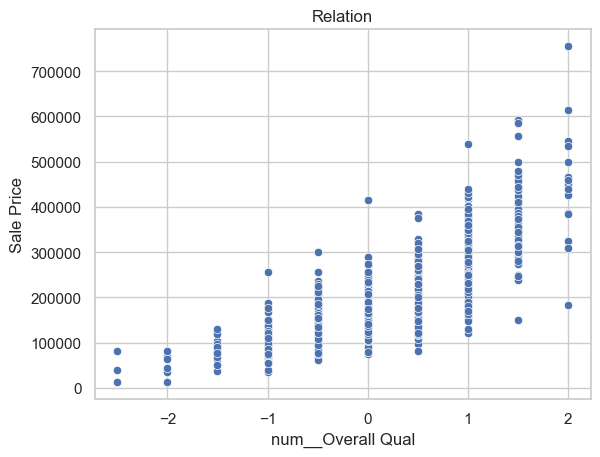

In [46]:
sns.scatterplot(x=X_train_top["num__Overall Qual"], y=y_train)
plt.xlabel("num__Overall Qual")
plt.ylabel("Sale Price")
plt.title("Relation")
plt.show()

#### Correlation Matrix

C:\Users\Hernan\AppData\Local\Temp\ipykernel_1448\1393128849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_top["SalePrice"] = y_train


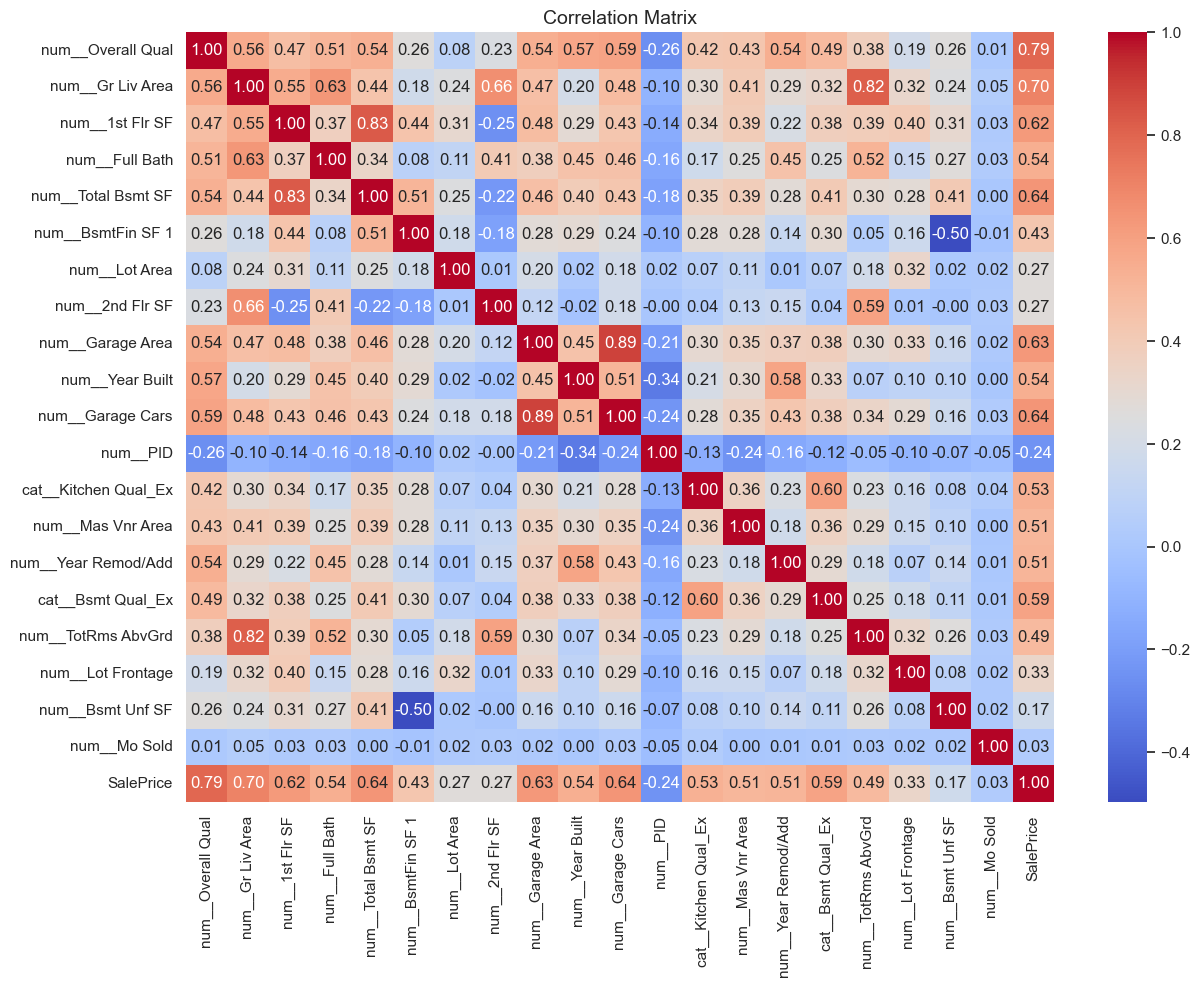

In [48]:
X_train_top["SalePrice"] = y_train

corr_matrix = X_train_top.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()

X_train_top = X_train_top.drop("SalePrice", axis=1)

## Training

### Testing Models: Linear Regression, SVM and Decision Trees

#### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_top, y_train)

LinearRegression()

In [53]:
y_pred_lr = lin_reg.predict(X_val_top)

In [54]:
test_metrics(y_val, y_pred_lr)

Mean Absolute Error: 20013.334785296593
Root Mean Squared Error: 41228.78302021385


#### SVM

In [56]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_reg.fit(X_train_top, y_train)

SVR(C=100)

In [57]:
y_pred_svm = svm_reg.predict(X_val_top)

In [58]:
test_metrics(y_val, y_pred_svm)

Mean Absolute Error: 49765.941722318385
Root Mean Squared Error: 77444.59991798704


#### Random Forest

In [60]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_reg.fit(X_train_top, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [61]:
y_pred_rf = rf_reg.predict(X_val_top)

In [62]:
test_metrics(y_val, y_pred_rf)

Mean Absolute Error: 16809.458368089265
Root Mean Squared Error: 28614.814546397844


#### Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=4, random_state=42)
gbr.fit(X_train_top, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=500, random_state=42)

In [65]:
y_pred_gbr = gbr.predict(X_val_top)

In [66]:
test_metrics(y_val, y_pred_gbr)

Mean Absolute Error: 16349.83277799662
Root Mean Squared Error: 28111.203838363577


## Improving Gradient Boosting Predictions

Gradient Boosting has obtained the best results, so this will be the model of choice.

### Optimising hiperparameters

In [70]:
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [1000, 2500, 5000],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 8, 10, 15],
    'subsample': [0.5, 0.8, 1.0, 1.5]
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_top, y_train)

C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hernan\anaconda3\Lib\site-p

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 8, 10, 15],
                         'n_estimators': [1000, 2500, 5000],
                         'subsample': [0.5, 0.8, 1.0, 1.5]},
             scoring='neg_root_mean_squared_error')

In [71]:
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE score from GridSearchCV:", -grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5000, 'subsample': 0.5}
Best RMSE score from GridSearchCV: 26459.95819495184


### Regularisation

In [73]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [5000],
    'max_depth': [3],
    'subsample': [0.5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ["auto", "sqrt", "log2"]
}

gb_reg = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gb_reg, 
    param_grid=param_grid, 
    cv=5, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_top, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Hernan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hernan\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5000], 'subsample': [0.5]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [74]:
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score from GridSearchCV:", -grid_search.best_score_)

Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5000, 'subsample': 0.5}
Best RMSE score from GridSearchCV: 25762.438849984734


In [75]:
gbr = grid_search.best_estimator_

In [76]:
y_pred_gbr = gbr.predict(X_test_top)

In [77]:
test_metrics(y_test, y_pred_gbr)

Mean Absolute Error: 14862.28993881365
Root Mean Squared Error: 22597.180790180402


### Visualising predictions

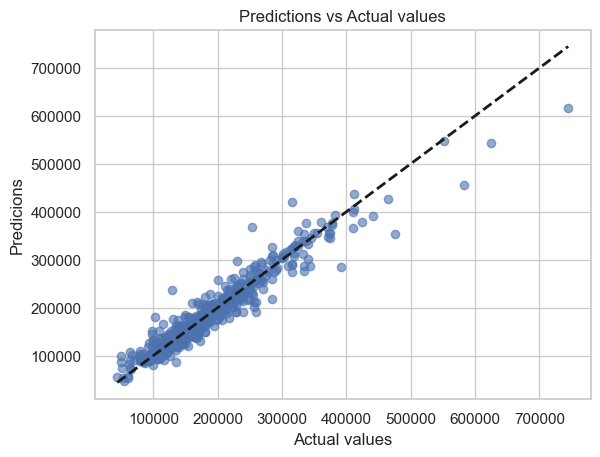

In [79]:
plt.scatter(y_test, y_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicions")
plt.title("Predictions vs Actual values")
plt.show()

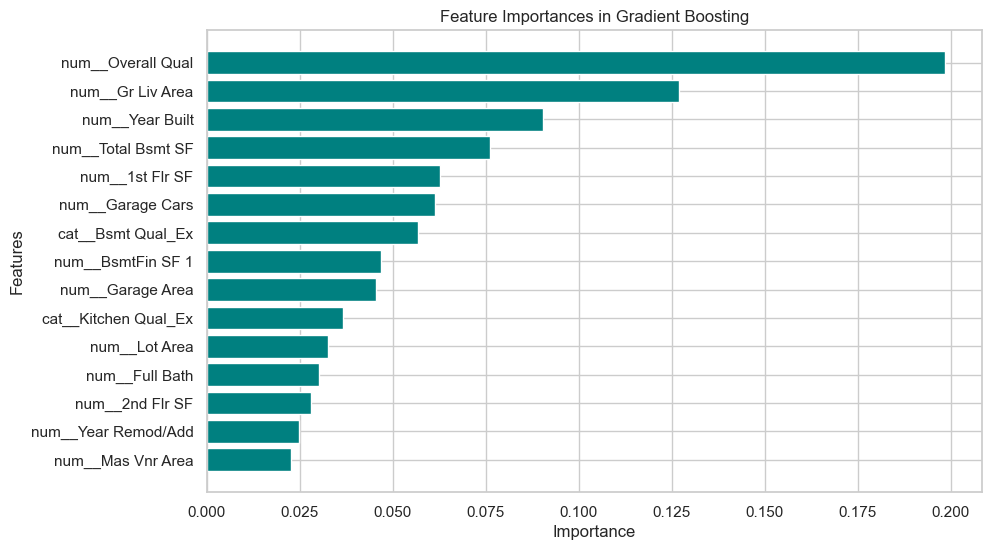

In [146]:
feature_importances = gbr.feature_importances_
features = X_train_top.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15], color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Gradient Boosting')
plt.show()


## Conclusión

El modelo de Gradient Boosting mostró un rendimiento sólido para la predicción de precios de vivienda en el dataset Ames Housing, alcanzando un RMSE de 22.597 en el conjunto de prueba. Este resultado indica que, en promedio, las predicciones se desvían por esta cantidad respecto a los valores reales. Además, el análisis de importancia de características destacó que variables como el área habitable (GrLivArea) y la calidad general de la construcción (OverallQual) tienen un impacto significativo en las predicciones.

### Futuras Mejoras

1. **Ajuste de Hiperparámetros Avanzados**: Explorar configuraciones más complejas, como técnicas de búsqueda bayesiana, podría mejorar aún más el rendimiento.
2. **Incorporación de Interacciones No Lineales**: Probar modelos más avanzados, como redes neuronales profundas, podría capturar relaciones no lineales que actualmente no son detectadas.
3. **Feature Engineering**: Crear nuevas características derivadas de combinaciones de las actuales, como relaciones de tamaño o índices de calidad-precio.
4. **Regularización Adicional**: Investigar la inclusión de estrategias como shrinkage o early stopping para evitar cualquier sobreajuste residual.
5. **Validación Cruzada Extensiva**: Probar esquemas de validación cruzada con diferentes divisiones o métodos como time-series split si los datos lo permiten.